# DRAFTS
We're interested in showing how the behaviour of people during the weekend and, in paritucular, at nighttime may have a result in social-related crimes.

In [22]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# pyplot standard
COLOR = '#727272'
plt.rcParams['font.family'] = 'Helvetica Neue'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

# Rename columns in data18 to match data24
data24 = pd.read_csv(
    "../../../_Police_Department_Incident_Reports__2018_to_Present_20250204.csv",
    usecols=['Row ID', 'Incident Datetime', 'Incident Category', 'Police District', 'Resolution', 'Latitude', 'Longitude'],
).set_index('Row ID')

data18 = pd.read_csv(
    "../../../_Police_Department_Incident_Reports__Historical_2003_to_May_2018_20250204.csv",
    usecols=['PdId', 'Category', 'Date', 'Time', 'PdDistrict', 'Resolution', 'X', 'Y'],
).rename(columns={
    'PdId': 'Row ID',
    'Category': 'Incident Category',
    'PdDistrict': 'Police District',
    'X': 'Latitude',
    'Y': 'Longitude',
}).set_index('Row ID')

# Parse the dates
data24['Incident Datetime'] = pd.to_datetime(data24['Incident Datetime'])
data18['Incident Datetime'] = pd.to_datetime(data18['Date'] + ' ' + data18['Time'])
data18.drop(columns=['Date', 'Time'], inplace=True)

# Filter out incomplete years in data18
years_data18 = data18['Incident Datetime'].dt.year.unique()
if len(years_data18) > 0:
    first_year_data18 = years_data18.min()
    last_year_data18 = years_data18.max()

    # Remove the first year if January is not represented
    if not (data18[(data18['Incident Datetime'].dt.year == first_year_data18) & (data18['Incident Datetime'].dt.month == 1)].shape[0] > 0):
        data18 = data18[data18['Incident Datetime'].dt.year != first_year_data18]

    # Remove the last year if December is not represented
    if not (data18[(data18['Incident Datetime'].dt.year == last_year_data18) & (data18['Incident Datetime'].dt.month == 12)].shape[0] > 0):
        data18 = data18[data18['Incident Datetime'].dt.year != last_year_data18]

# Filter out incomplete years in data24
years_data24 = data24['Incident Datetime'].dt.year.unique()
if len(years_data24) > 0:
    first_year_data24 = years_data24.min()
    last_year_data24 = years_data24.max()

    # Remove the first year if January is not represented
    if not (data24[(data24['Incident Datetime'].dt.year == first_year_data24) & (data24['Incident Datetime'].dt.month == 1)].shape[0] > 0):
        data24 = data24[data24['Incident Datetime'].dt.year != first_year_data24]

    # Remove the last year if December is not represented
    if not (data24[(data24['Incident Datetime'].dt.year == last_year_data24) & (data24['Incident Datetime'].dt.month == 12)].shape[0] > 0):
        data24 = data24[data24['Incident Datetime'].dt.year != last_year_data24]


# Combine the datasets
d = pd.concat([data18, data24])

# Remove geographical outliers
# d = d[(d['Latitude'] < 50) & (d['Longitude'] < -122)]

# Clean strings
def clean_string(s):
    if isinstance(s, str):
        return s.strip().lower().replace('_', ' ')
    return s

for col in ['Incident Category', 'Police District', 'Resolution']:
    d[col] = d[col].map(clean_string)

# Mapping similar categories to standardized names
d['Incident Category'] = d['Incident Category'].replace({
    'vandalism' : 'malicious mischief',
    'larceny/theft': 'larceny theft',
    'warrants': 'warrant',
    'drug/narcotic': 'drug offense',
    'suspicious occ': 'suspicious occurrence',
    'weapon laws': 'weapons offense',
    'non-criminal': 'non criminal',
    'missing person': 'missing person',
    'sex offenses, forcible': 'sex offense',
    'sex offenses, non forcible': 'sex offense',
    'forgery/counterfeiting': 'forgery and counterfeiting',
    'driving under the influence': 'dui',
    'stolen property': 'stolen property',
    'vehicle theft': 'motor vehicle theft',
    'motor vehicle theft?': 'motor vehicle theft',
    'weapons carrying etc': 'weapons offense',
    'weapons offence': 'weapons offense',
    'weapons offense': 'weapons offense',
    'prostitution': 'prostitution',
    'arson': 'arson',
    'fraud': 'fraud',
    'embezzlement': 'embezzlement',
    'gambling': 'gambling',
    'human trafficking (a), commercial sex acts': 'human trafficking',
    'human trafficking, commercial sex acts': 'human trafficking',
    'human trafficking (b), involuntary servitude': 'human trafficking',
    'other offenses': 'other offense',
    'miscellaneous investigation': 'other offense'
})

# Handle missing values
d = d.dropna(subset=['Incident Category'])

# --- END NORMALIZATION ---

# Define and consider the focus crimes only
focuscrimes = set(['weapons offense', 'prostitution', 'robbery', 'burglary', 'assault','drug offense', 'larceny theft', 'malicious mischief', 'motor vehicle theft', 'stolen property'])
d_focus = d[d['Incident Category'].isin(focuscrimes)]

In [15]:
d.sort_values(by='Incident Datetime')

,Incident Category,Police District,Resolution,Latitude,Longitude,Incident Datetime
Row ID,,,,,,
5081418064070,suspicious occurrence,southern,none,-122.403405,37.775421,2003-01-01 00:01:00
7062189600000,other offense,ingleside,"arrest, booked",-122.420272,37.747332,2003-01-01 00:01:00
3114370219065,loitering,central,none,-122.410722,37.787097,2003-01-01 00:01:00
8118323109120,forgery and counterfeiting,northern,none,-122.435517,37.797573,2003-01-01 00:01:00
4141636719050,other offense,bayview,none,-122.407721,37.724547,2003-01-01 00:01:00
...,...,...,...,...,...,...
145309009320,fraud,mission,open or active,NaN,NaN,2024-12-31 23:30:00
145137571000,lost property,northern,open or active,37.799843,-122.436043,2024-12-31 23:30:00
145281371000,lost property,northern,open or active,NaN,NaN,2024-12-31 23:45:00


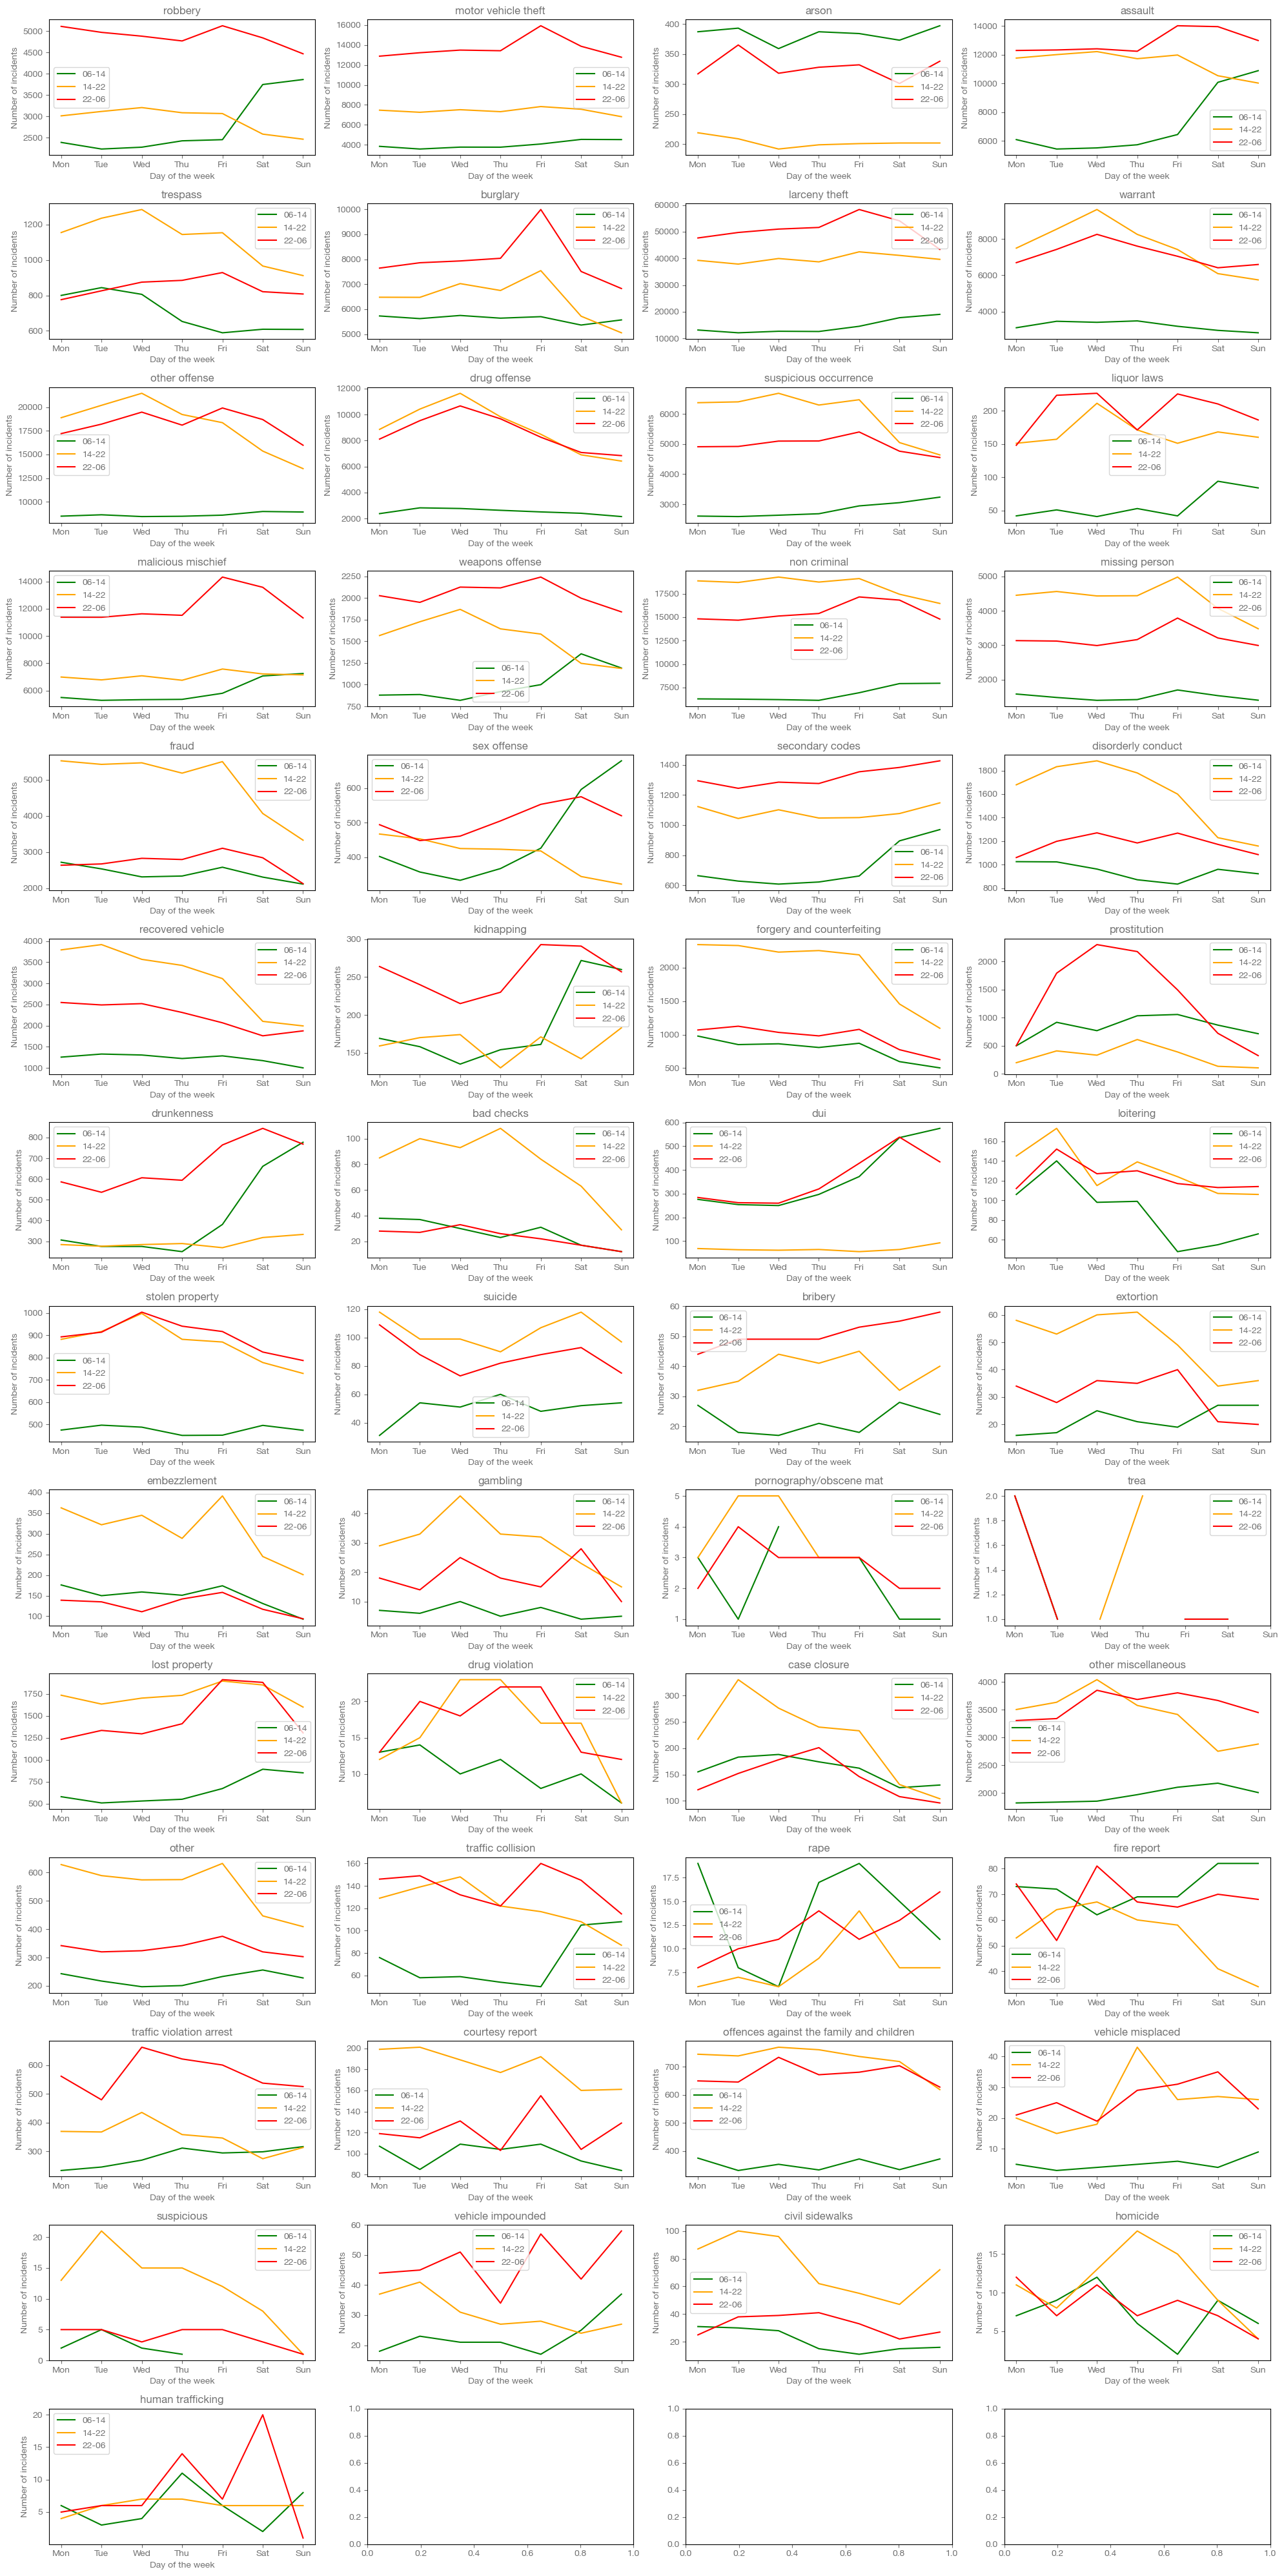

In [16]:
categories = d['Incident Category'].unique()
fig, axes = plt.subplots(len(categories) // 4 + 1, 4, figsize=(20, 40))

# plot the crimes over the time in the week for each category (for each day show 06-14, 14-22, 22-06)
# e.g. show Mon 06-14, Mon 14-22, Mon 22-06, Tue 06-14, ...
for ax, crime in zip(axes.flatten(), categories):
    d[d['Incident Category'] == crime].groupby(
        [d['Incident Datetime'].dt.dayofweek, d['Incident Datetime'].dt.hour // 8]
    ).size().unstack().plot(ax=ax, title=crime, color=['green', 'orange', 'red'])

    ax.set_xticks(range(7))
    ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    ax.set_xlabel('Day of the week')
    ax.set_ylabel('Number of incidents')
    ax.legend(['06-14', '14-22', '22-06'])

plt.tight_layout()
plt.show()

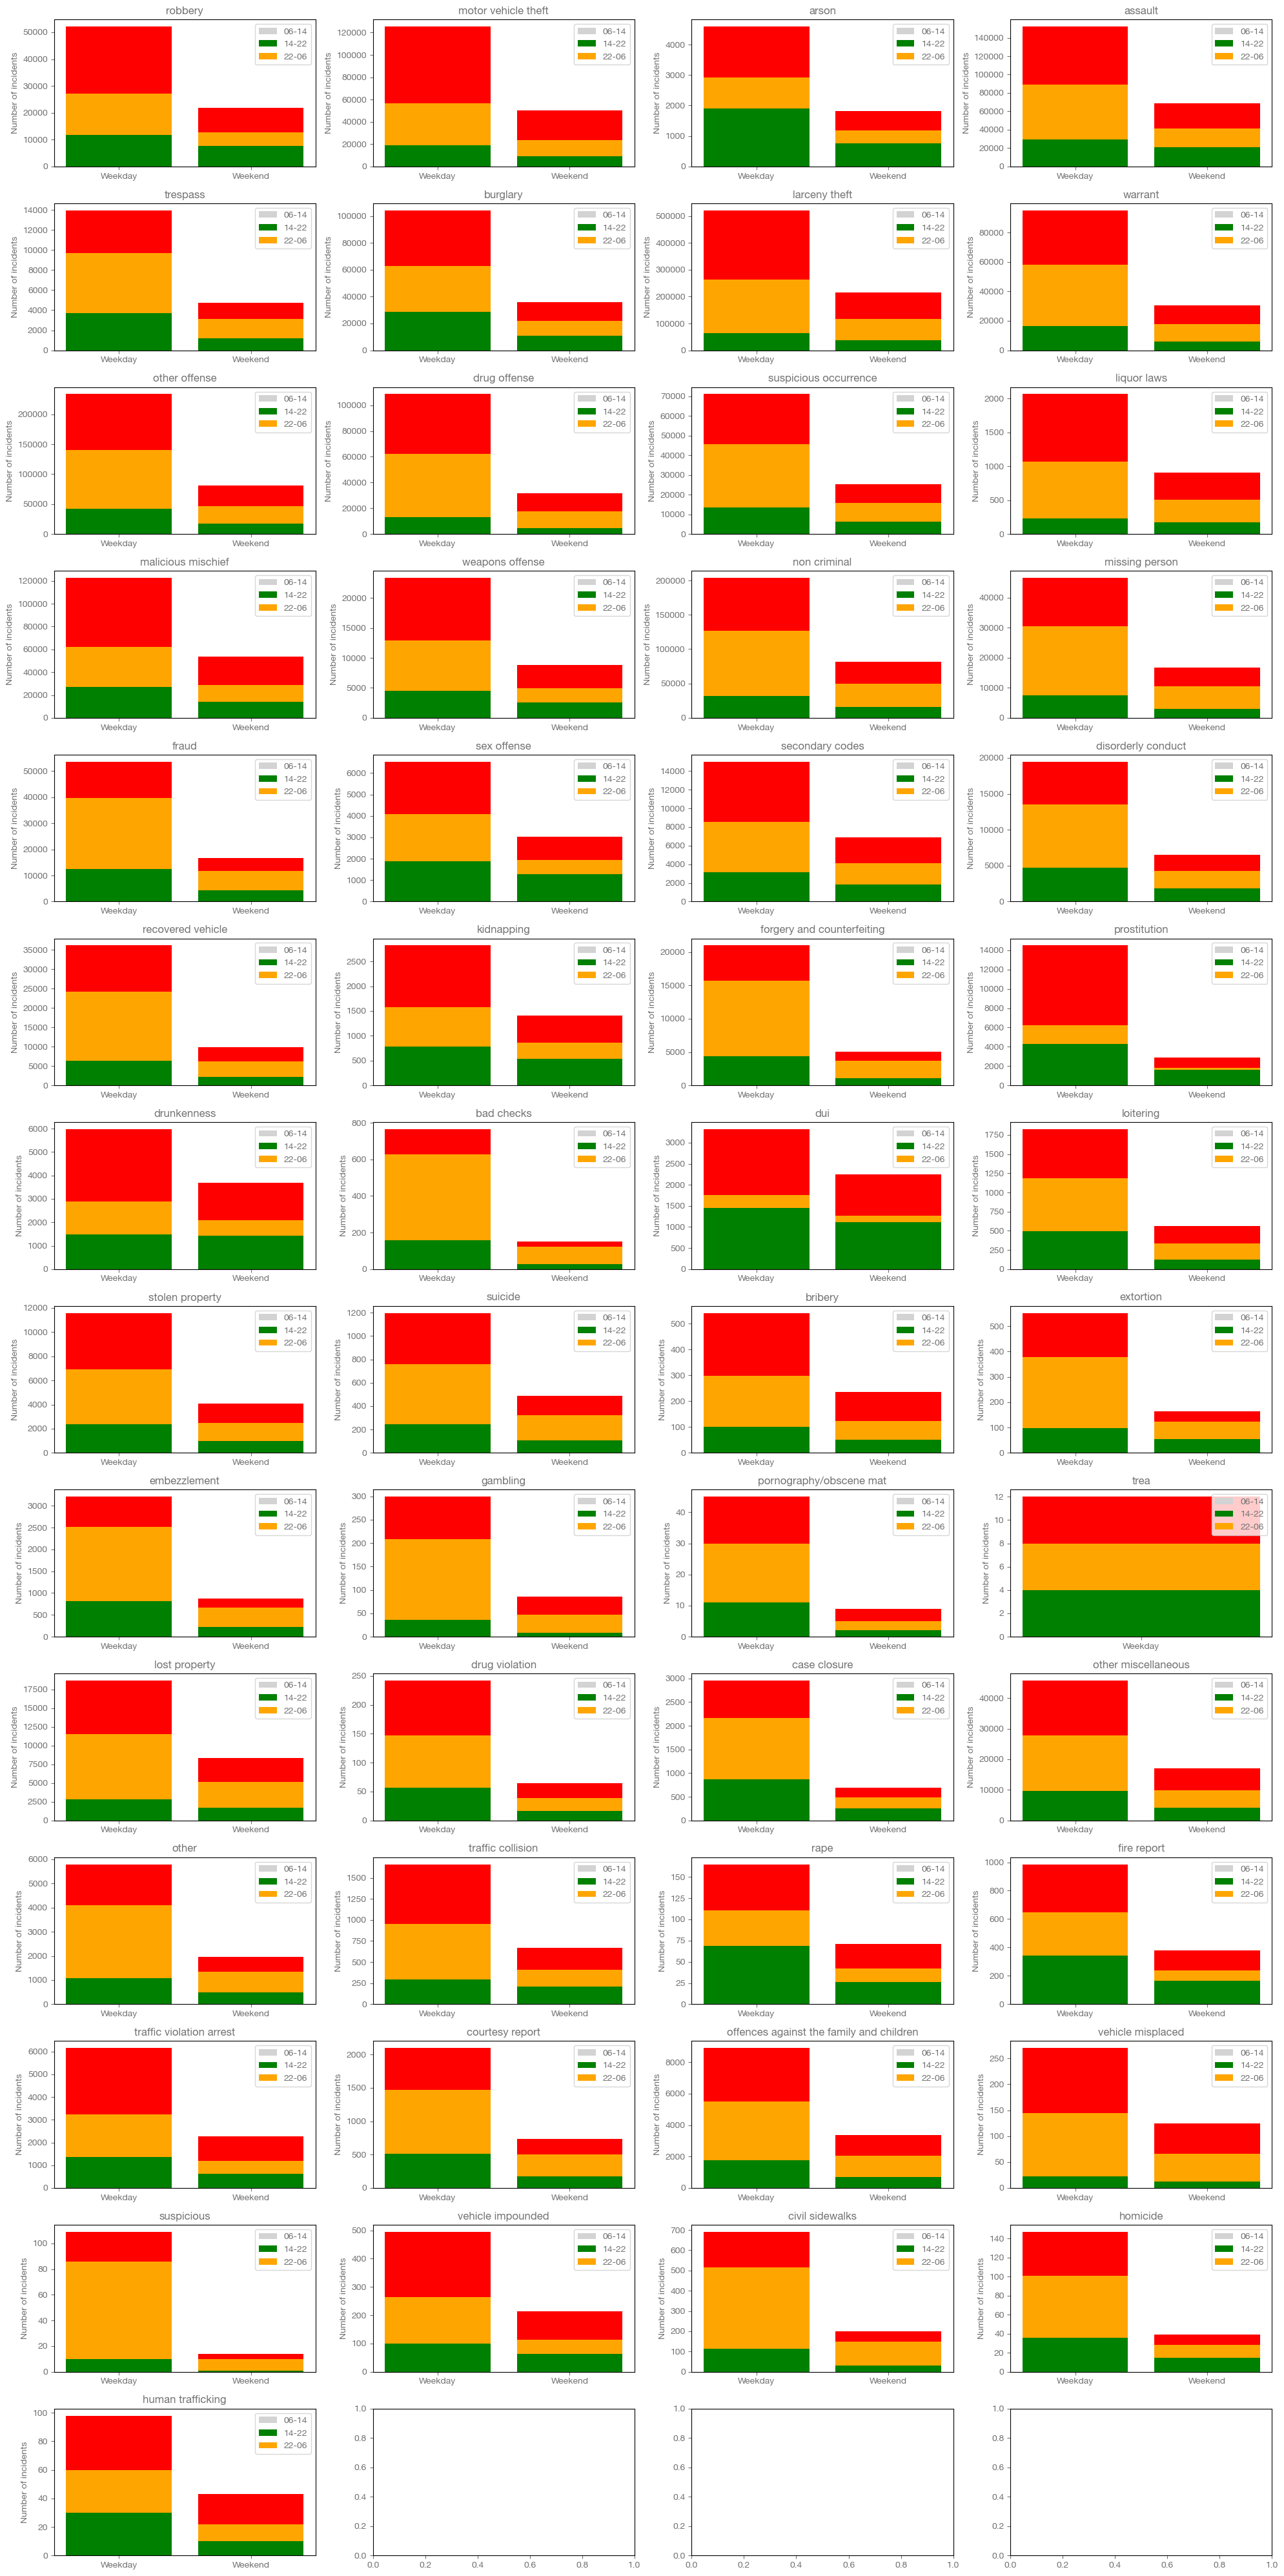

In [17]:
categories = d['Incident Category'].unique()
fig, axes = plt.subplots(len(categories) // 4 + 1, 4, figsize=(20, 40))

for ax, crime in zip(axes.flatten(), categories):
    # Group by weekday/weekend and time of day
    crime_data = d[d['Incident Category'] == crime].copy()
    crime_data['weekday'] = crime_data['Incident Datetime'].dt.dayofweek < 5  # True for weekday, False for weekend
    crime_data['time_slot'] = crime_data['Incident Datetime'].dt.hour // 8

    grouped = crime_data.groupby(['weekday', 'time_slot']).size().unstack()

    # Calculate proportions for each weekday/weekend
    # if grouped.shape[1] < 3:
    #     continue

    grouped['total'] = grouped[0] + grouped[1] + grouped[2]
    grouped['06-14'] = grouped[0] / grouped['total']
    grouped['14-22'] = grouped[1] / grouped['total']
    grouped['22-06'] = grouped[2] / grouped['total']

    # Plotting the stacked bar chart
    weekday_values = grouped.loc[True][['06-14', '14-22', '22-06']].values
    weekend_values = grouped.loc[False][['06-14', '14-22', '22-06']].values

    ax.bar(['Weekday'], [grouped.loc[True]['total']], color='lightgrey')
    ax.bar(['Weekday'], [grouped.loc[True]['total'] * weekday_values[0]], color='green')
    ax.bar(['Weekday'], [grouped.loc[True]['total'] * weekday_values[1]], bottom=[grouped.loc[True]['total'] * weekday_values[0]], color='orange')
    ax.bar(['Weekday'], [grouped.loc[True]['total'] * weekday_values[2]], bottom=[grouped.loc[True]['total'] * (weekday_values[0] + weekday_values[1])], color='red')

    ax.bar(['Weekend'], [grouped.loc[False]['total']], color='lightgrey')
    ax.bar(['Weekend'], [grouped.loc[False]['total'] * weekend_values[0]], color='green')
    ax.bar(['Weekend'], [grouped.loc[False]['total'] * weekend_values[1]], bottom=[grouped.loc[False]['total'] * weekend_values[0]], color='orange')
    ax.bar(['Weekend'], [grouped.loc[False]['total'] * weekend_values[2]], bottom=[grouped.loc[False]['total'] * (weekend_values[0] + weekend_values[1])], color='red')

    ax.set_title(crime)
    ax.set_ylabel('Number of incidents')
    ax.legend(['06-14', '14-22', '22-06'])

plt.tight_layout()
plt.show()

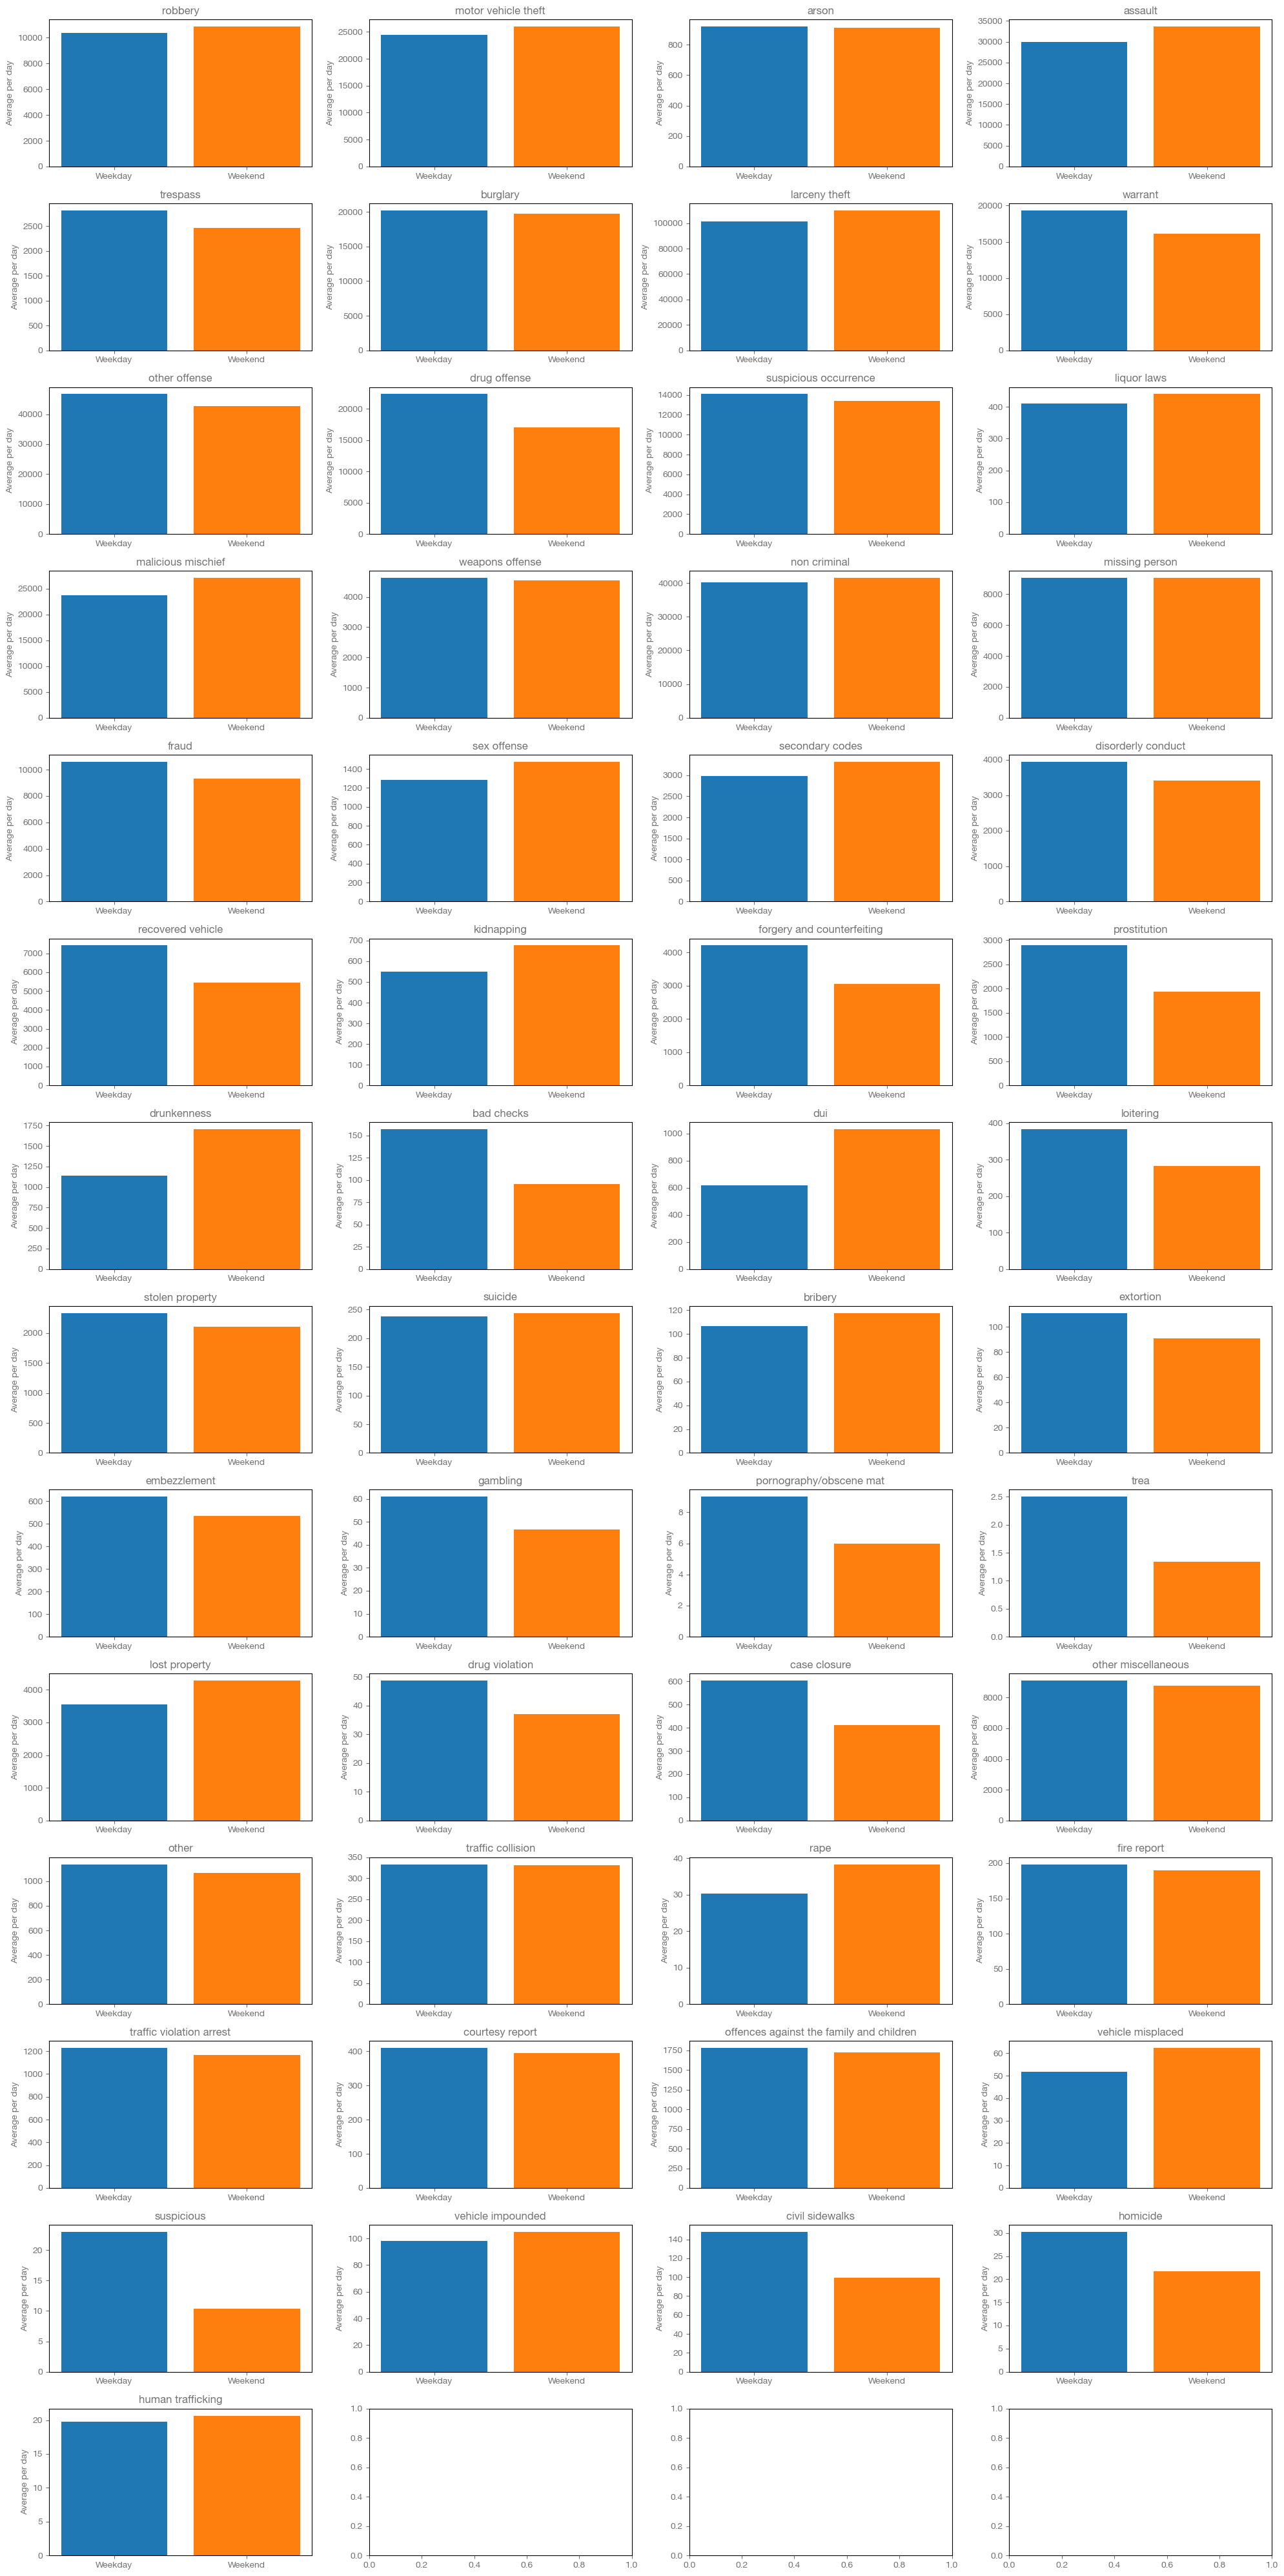

In [18]:
categories = d['Incident Category'].unique()
fig, axes = plt.subplots(len(categories) // 4 + 1, 4, figsize=(20, 40))

for ax, crime in zip(axes.flatten(), categories):
    # Group by weekday/weekend and time of day
    crime_data = d[d['Incident Category'] == crime].copy()
    crime_data['is_weekday'] = crime_data['Incident Datetime'].dt.dayofweek < 4  # True for weekday, False for weekend

    # Calculate total incidents and average per day for weekdays and weekends
    weekday_counts = crime_data[crime_data['is_weekday']].shape[0]
    weekend_counts = crime_data[~crime_data['is_weekday']].shape[0]

    weekday_avg = weekday_counts / 4 if weekday_counts > 0 else 0
    weekend_avg = weekend_counts / 3 if weekend_counts > 0 else 0

    # Plotting the average incidents per day
    ax.bar(['Weekday'], [weekday_avg])
    ax.bar(['Weekend'], [weekend_avg])

    ax.set_title(crime)
    ax.set_ylabel('Average per day')

plt.tight_layout()
plt.show()

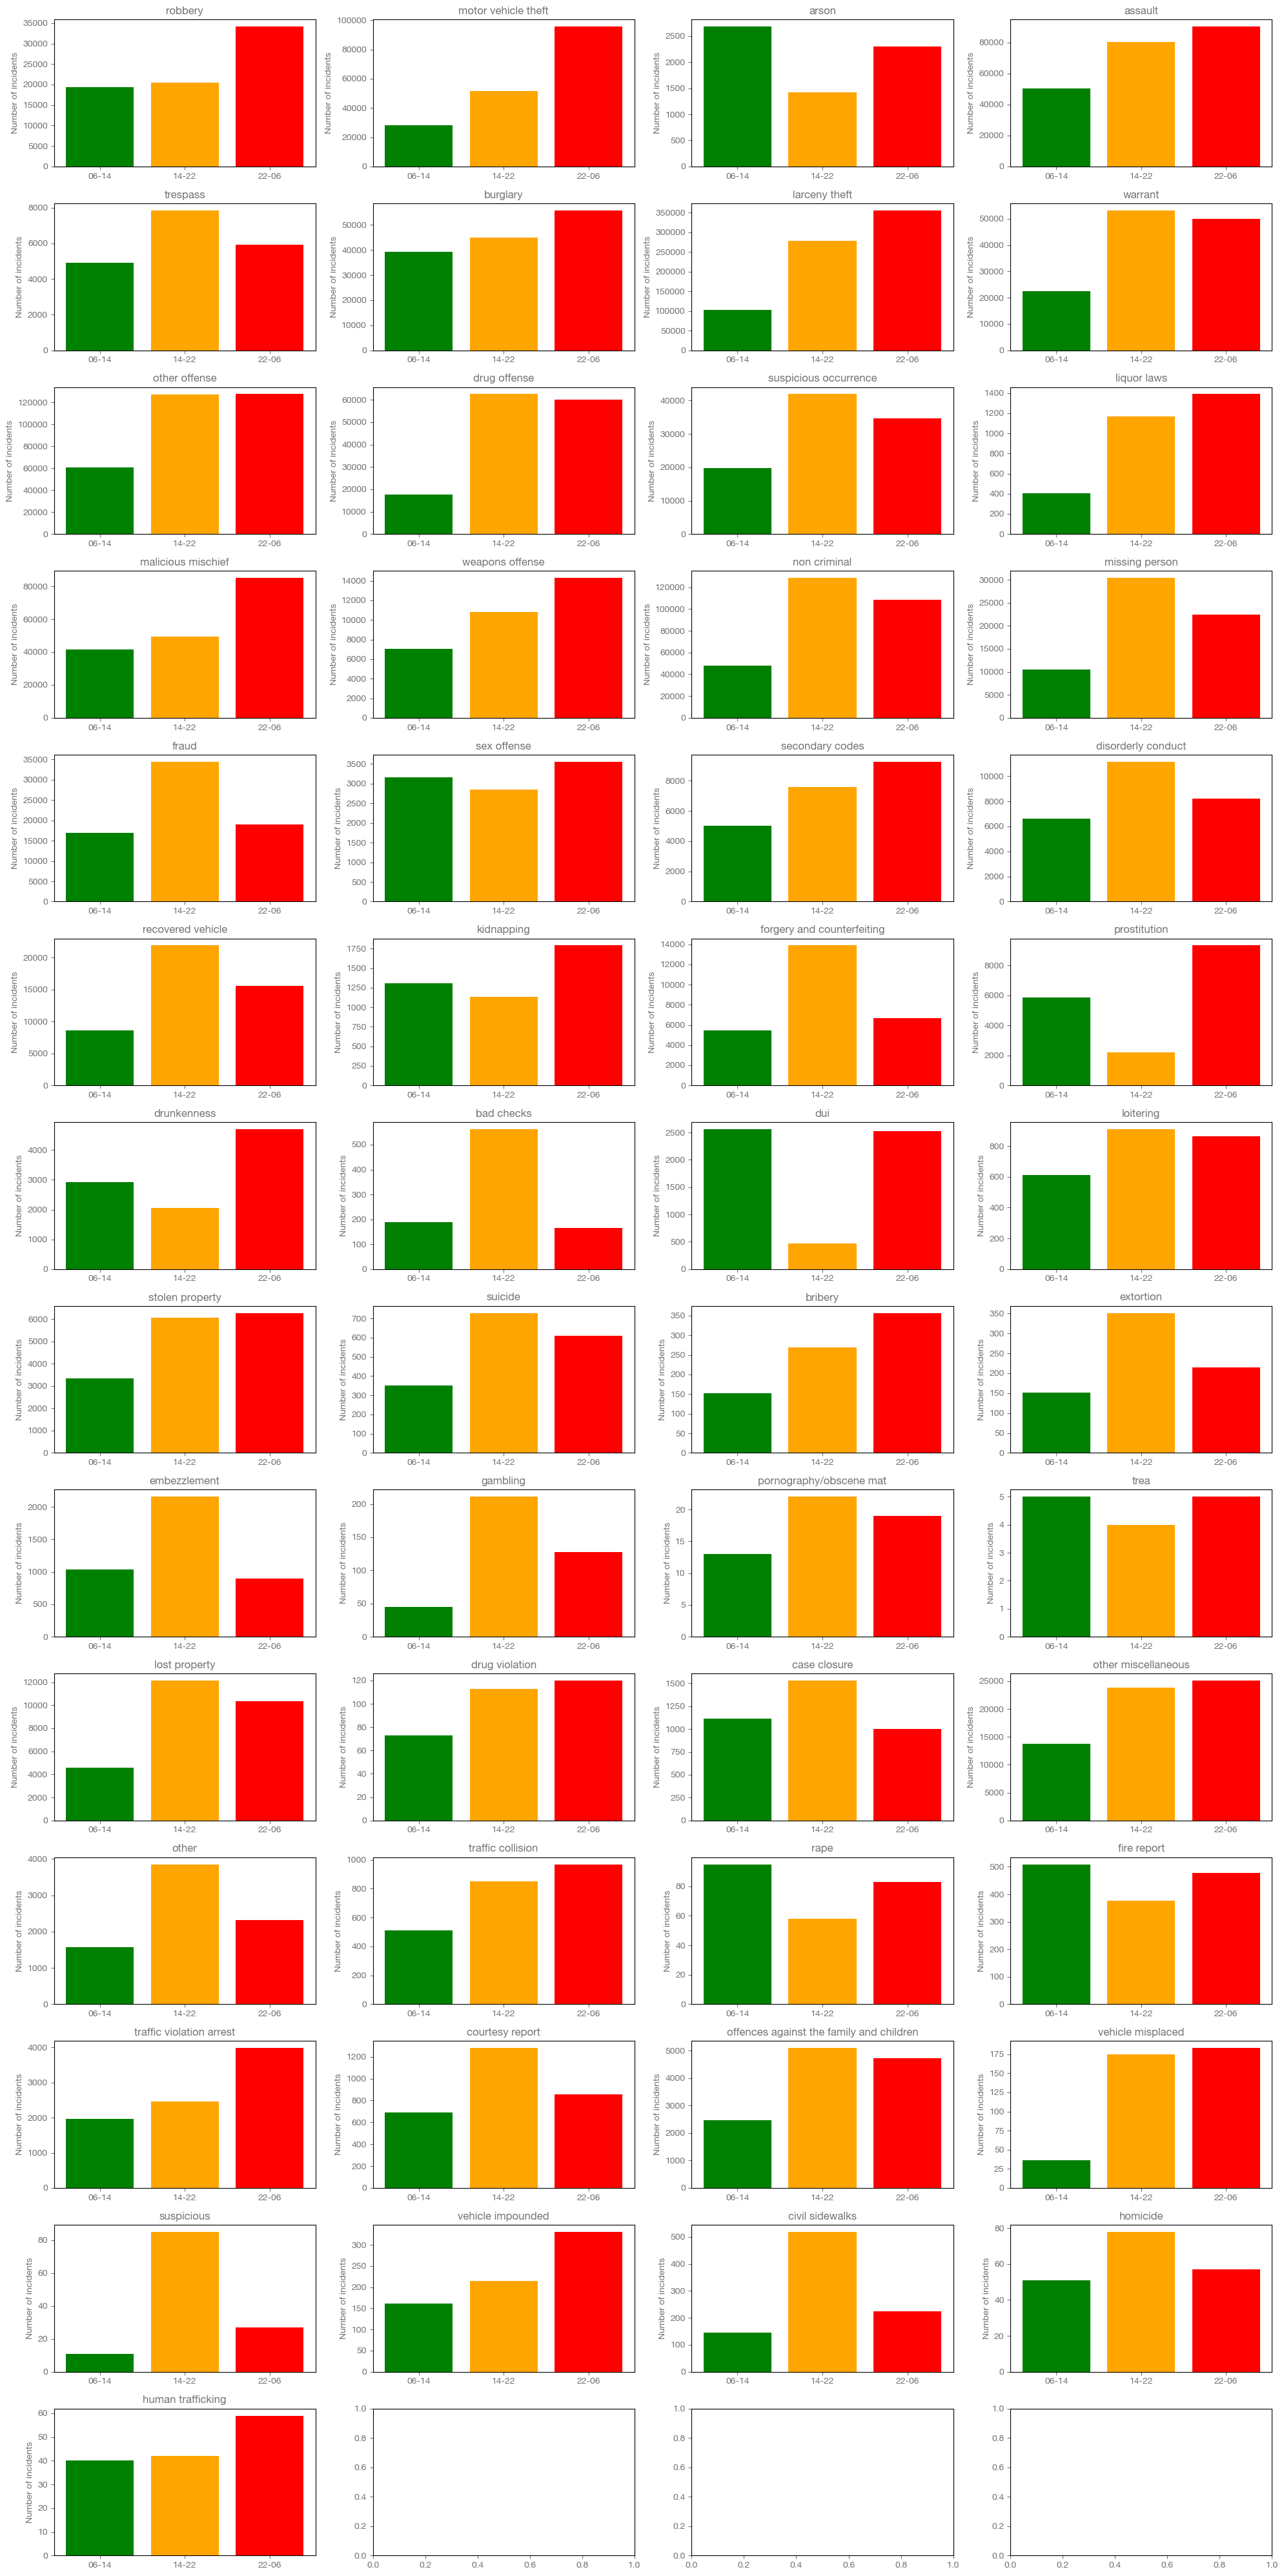

In [19]:
categories = d['Incident Category'].unique()
fig, axes = plt.subplots(len(categories) // 4 + 1, 4, figsize=(20, 40))

for ax, crime in zip(axes.flatten(), categories):
    # Group by time of day
    crime_data = d[d['Incident Category'] == crime].copy()
    crime_data['time_slot'] = crime_data['Incident Datetime'].dt.hour // 8

    # Calculate average incidents for each time slot
    slot0_avg = crime_data[crime_data['time_slot'] == 0].shape[0]
    slot1_avg = crime_data[crime_data['time_slot'] == 1].shape[0]
    slot2_avg = crime_data[crime_data['time_slot'] == 2].shape[0]

    # Plotting the average incidents per time slot
    ax.bar(['06-14'], [slot0_avg], color='green')
    ax.bar(['14-22'], [slot1_avg], color='orange')
    ax.bar(['22-06'], [slot2_avg], color='red')

    ax.set_title(crime)
    ax.set_ylabel('Number of incidents')

plt.tight_layout()
plt.show()


# Plot 1

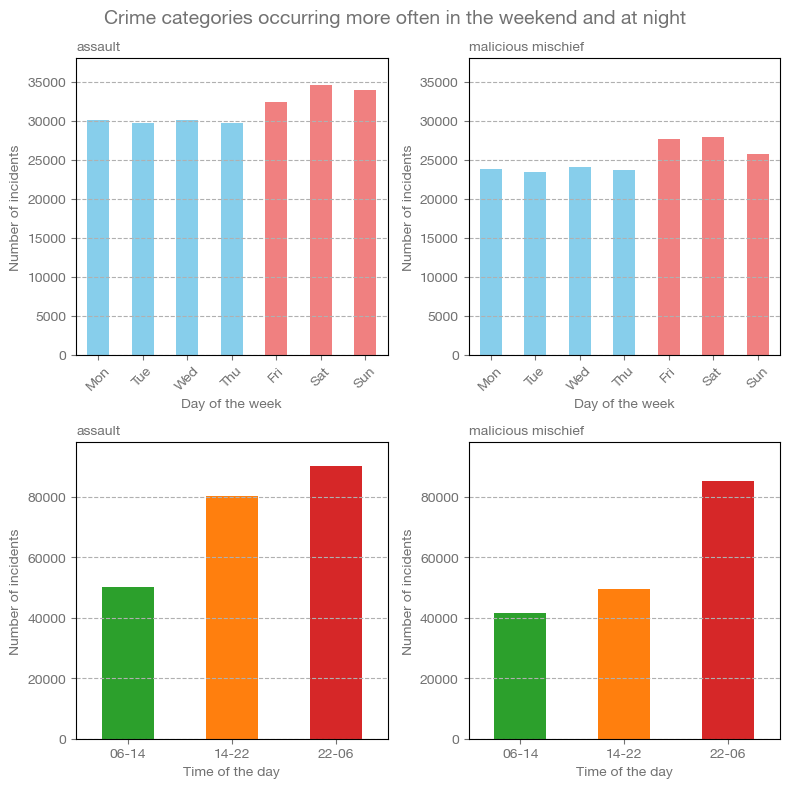

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# Define weekday colors (Mon-Thu) and weekend colors (Fri-Sun)
weekday_color = 'skyblue'
weekend_color = 'lightcoral'



# Group by day of the week
for i, crime in enumerate(['assault', 'malicious mischief']):
    crime_data = d[d['Incident Category'] == crime].copy()
    crime_data_dayofweek = crime_data.groupby(crime_data['Incident Datetime'].dt.dayofweek).size()

    # Plotting the average incidents per day of the week
    ax = axes[0, i]  # Select the subplot in the first row
    
    # Assign colors based on weekday/weekend
    colors = [weekday_color if day < 4 else weekend_color for day in range(7)]
    
    crime_data_dayofweek.plot(kind='bar', ax=ax, color=colors)
    ax.set_xticks(range(7))
    ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
    ax.set_xlabel('Day of the week')
    ax.set_title(crime, fontsize = 10, loc='left')
    ax.set_ylabel('Number of incidents')
    ax.set_ylim([0, 38000])
    ax.grid(axis='y', linestyle='--')

# Define time slot colors
time_slot_colors = ['#2ca02c', '#ff7f0e', '#d62728']

# Group by time of the day
for i, crime in enumerate(['assault', 'malicious mischief']):
    crime_data = d[d['Incident Category'] == crime].copy()
    crime_data_timeofday = crime_data.groupby(crime_data['Incident Datetime'].dt.hour // 8).size()

    # Plotting the average incidents per time slot
    ax = axes[1, i]  # Select the subplot in the second row
    crime_data_timeofday.plot(kind='bar', ax=ax, color=time_slot_colors)
    ax.set_xticks(range(3))
    ax.set_xticklabels(['06-14', '14-22', '22-06'], rotation=0)
    ax.set_xlabel('Time of the day')
    ax.set_title(crime, fontsize = 10, loc='left')
    ax.set_ylabel('Number of incidents')
    ax.set_ylim([0, 98000])
    ax.grid(axis='y', linestyle='--')


fig.suptitle('Crime categories occurring more often in the weekend and at night', fontsize=14)

plt.tight_layout()
plt.savefig('../images/assignment2_plot1.png')

In [21]:
import folium
import folium.plugins

sf_map = folium.Map([37.753836586731786, -122.4185939462998], zoom_start=12)
d_assault = d[d["Incident Category"] == "assault"].copy()
d_assault['weekend'] = d_assault['Incident Datetime'].dt.dayofweek >= 4
d_mm = d[d["Incident Category"] == "malicious mischief"].copy()
d_mm['weekend'] = d_mm['Incident Datetime'].dt.dayofweek >= 4

week_parts = ['weekday', 'weekend']

# Group data by each month and convert to list
heatmap_data = [
    d_prostitution_20m[d_prostitution_20m["Month"] == month][["Latitude", "Longitude"]].dropna().values.tolist()
    for month in months
]

folium.plugins.HeatMapWithTime(
    heatmap_data,
    index=[week_parts],  # Labels for time slider
    auto_play=True,
    radius=30,
    blur=1,
    max_opacity=0.8,
    speed_step=0.5,
).add_to(sf_map)


sf_map

NameError: name 'months' is not defined